In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [10]:
data = pd.read_csv('tagged_cleandata.csv')

In [15]:
print(data["Category"].value_counts())

Fund Transfer             60567
Cash Deposit              17298
Uncategorized             13822
Financial Services        12916
Cheque Deposit             2560
Salary                     1159
Office Expense             1083
Cash Withdrawal            1054
Bill Payment                859
Tax Payment                 561
Telecom Bill                430
International Payments      146
Loan Repayment              142
Utility Bill                 52
Insurance Payment            17
Travel Expense               10
Charges and Fees              9
Vendor Payment                5
Interest Income               5
Reimbursement                 2
Name: Category, dtype: int64


In [16]:
data

,DATE,TRANSACTION DETAILS,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,Category
0,29-06-2017,TRF FROM Indiaforensic SERVICES,0.00,1000000.0,1.000000e+06,Fund Transfer
1,05-07-2017,TRF FROM Indiaforensic SERVICES,0.00,1000000.0,2.000000e+06,Fund Transfer
2,18-07-2017,FDRL/INTERNAL FUND TRANSFE,0.00,500000.0,2.500000e+06,Fund Transfer
3,01-08-2017,TRF FRM Indiaforensic SERVICES,0.00,3000000.0,5.500000e+06,Fund Transfer
4,16-08-2017,FDRL/INTERNAL FUND TRANSFE,0.00,500000.0,6.000000e+06,Fund Transfer
...,...,...,...,...,...,...
112692,29-11-2018,Sweep Trf To: 40900036427,1.00,0.0,-1.894294e+09,Uncategorized
112693,30-11-2018,IMPS 2911181C,170160.95,0.0,-1.894464e+09,Fund Transfer
112694,30-11-2018,IMPS 3011182C,55943.98,0.0,-1.894520e+09,Fund Transfer
112695,30-11-2018,IMPS 3011183C,44517.37,0.0,-1.894565e+09,Fund Transfer


In [17]:
# Encode the target variable (ledger tags)
label_encoder = LabelEncoder()
data["Category"] = label_encoder.fit_transform(data["Category"])

# Split data
X_text = data["TRANSACTION DETAILS"]
y = data["Category"]
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2), stop_words="english")
X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine (SVM)": SVC(kernel='linear', probability=True, random_state=42)
}

# Train models
trained_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    trained_models[model_name] = model


Training Random Forest...
Training Logistic Regression...
Training K-Nearest Neighbors...
Training Support Vector Machine (SVM)...


In [19]:
# Evaluate all models
def evaluate_model(name, model, X_test, y_test):
    predictions = model.predict(X_test)
    print(f"--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Return metrics and predictions
    return {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Predictions": predictions
    }

evaluation_results = []
for model_name, model in trained_models.items():
    result = evaluate_model(model_name, model, X_test, y_test)
    evaluation_results.append(result)


--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00      3473
           2       0.99      0.99      0.99       216
           4       1.00      1.00      1.00       527
           5       0.82      0.98      0.90      2607
           6       0.97      0.95      0.96     12077
           7       0.75      0.75      0.75         4
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00       207
          13       1.00      0.99      1.00       241
          14       1.00      0.95      0.97       117
          15       0.99      0.96      0.97        90
          16       0.00      0.00      0.00         1
          17       0.99      0.87      0.93      2744
          18       0.00      0.00   

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metr

--- K-Nearest Neighbors ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       158
           1       1.00      1.00      1.00      3473
           2       1.00      0.99      1.00       216
           4       1.00      1.00      1.00       527
           5       0.82      0.98      0.89      2607
           6       0.96      0.95      0.96     12077
           7       0.75      0.75      0.75         4
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00       207
          13       1.00      0.99      1.00       241
          14       1.00      0.94      0.97       117
          15       1.00      0.96      0.98        90
          16       1.00      1.00      1.00         1
          17       0.99      0.87      0.92      2744
          18       0.00      0

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metr

--- Support Vector Machine (SVM) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       158
           1       1.00      1.00      1.00      3473
           2       0.99      1.00      0.99       216
           4       1.00      1.00      1.00       527
           5       0.82      0.98      0.89      2607
           6       0.96      0.95      0.96     12077
           7       0.75      0.75      0.75         4
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00       207
          13       1.00      1.00      1.00       241
          14       1.00      0.95      0.97       117
          15       1.00      0.96      0.98        90
          16       0.00      0.00      0.00         1
          17       0.99      0.87      0.93      2744
          18       0.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metr

In [20]:
# Find the best model based on F1 Score
best_model = max(evaluation_results, key=lambda x: x['F1 Score'])

print("\n--- Best Model ---")
print(f"Best Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}, F1 Score: {best_model['F1 Score']:.4f}")


--- Best Model ---
Best Model: Random Forest
Accuracy: 0.9559, F1 Score: 0.9560


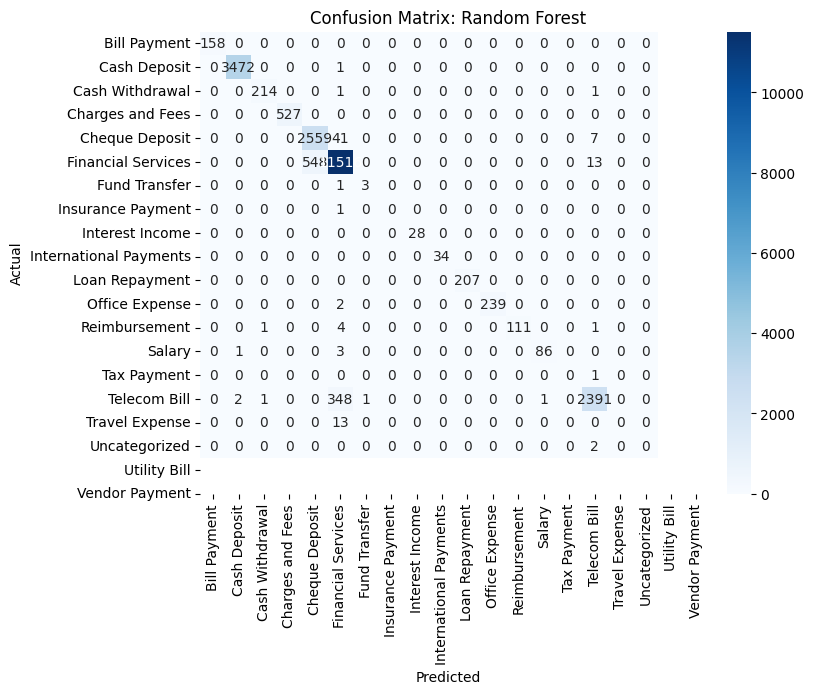

--- Misclassified Transactions: Random Forest ---
                     Transaction Details         Actual           Predicted
110815          TDS operative a/c dr for  Uncategorized       Fund Transfer
74077                    IRTT00701812717  Uncategorized       Fund Transfer
103611               TO For 709003957853  Uncategorized       Fund Transfer
89288                           TRF FROM  Fund Transfer       Uncategorized
82239                    IRTT00701830921  Uncategorized       Fund Transfer
95460    TRF FROM Indiaforensic SERVICES  Fund Transfer  Financial Services
88359    TRF FROM Indiaforensic SERVICES  Fund Transfer  Financial Services
112684  TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services
74009   TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services
80024   TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services




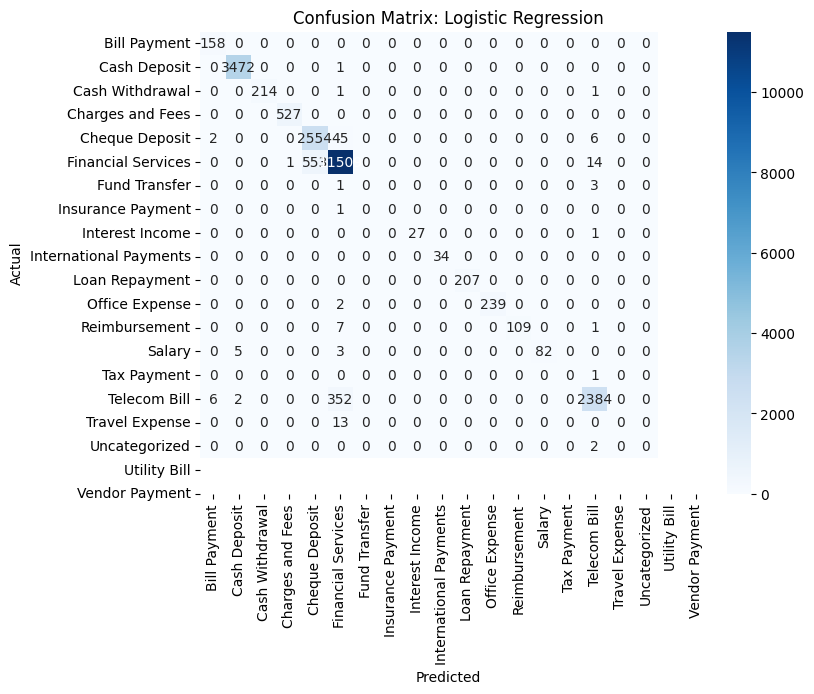

--- Misclassified Transactions: Logistic Regression ---
                     Transaction Details         Actual           Predicted
110815          TDS operative a/c dr for  Uncategorized       Fund Transfer
74077                    IRTT00701812717  Uncategorized       Fund Transfer
103611               TO For 709003957853  Uncategorized       Fund Transfer
89288                           TRF FROM  Fund Transfer       Uncategorized
82239                    IRTT00701830921  Uncategorized       Fund Transfer
95460    TRF FROM Indiaforensic SERVICES  Fund Transfer  Financial Services
88359    TRF FROM Indiaforensic SERVICES  Fund Transfer  Financial Services
112684  TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services
74009   TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services
80024   TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services




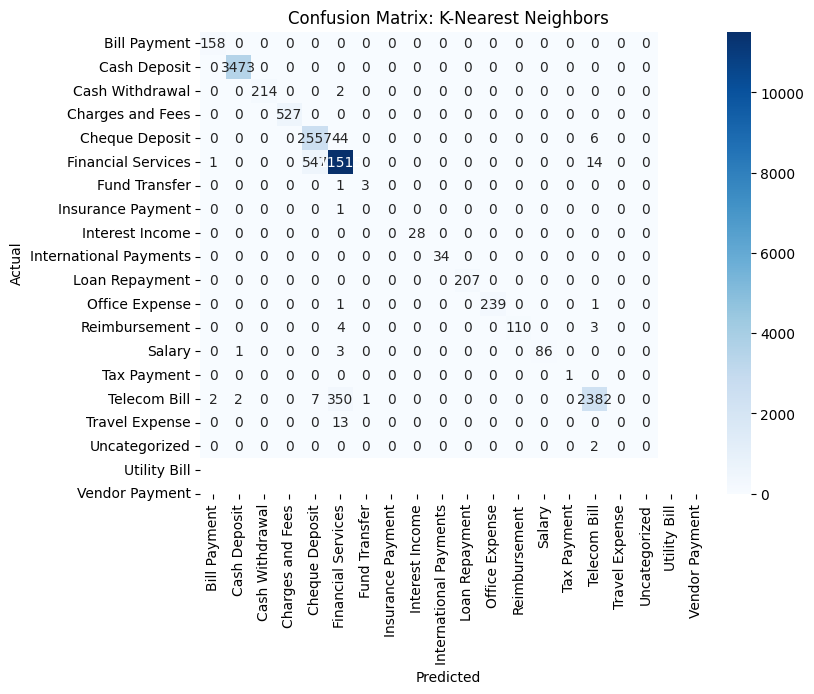

--- Misclassified Transactions: K-Nearest Neighbors ---
                     Transaction Details         Actual           Predicted
110815          TDS operative a/c dr for  Uncategorized       Fund Transfer
74077                    IRTT00701812717  Uncategorized       Fund Transfer
103611               TO For 709003957853  Uncategorized       Fund Transfer
89288                           TRF FROM  Fund Transfer       Uncategorized
82239                    IRTT00701830921  Uncategorized       Fund Transfer
95460    TRF FROM Indiaforensic SERVICES  Fund Transfer  Financial Services
88359    TRF FROM Indiaforensic SERVICES  Fund Transfer  Financial Services
112684  TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services
74009   TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services
80024   TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services




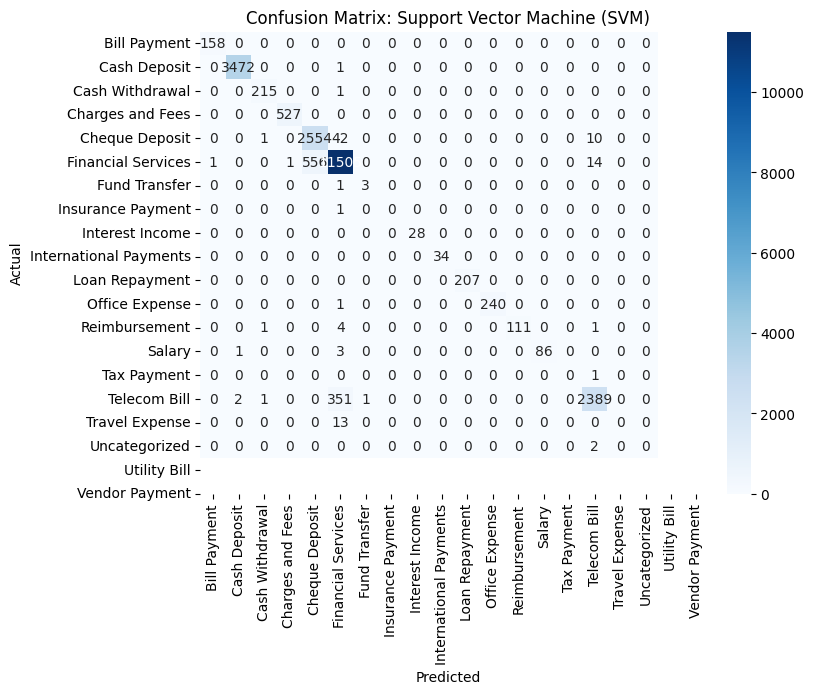

--- Misclassified Transactions: Support Vector Machine (SVM) ---
                     Transaction Details         Actual           Predicted
110815          TDS operative a/c dr for  Uncategorized       Fund Transfer
74077                    IRTT00701812717  Uncategorized       Fund Transfer
103611               TO For 709003957853  Uncategorized       Fund Transfer
89288                           TRF FROM  Fund Transfer       Uncategorized
82239                    IRTT00701830921  Uncategorized       Fund Transfer
95460    TRF FROM Indiaforensic SERVICES  Fund Transfer  Financial Services
88359    TRF FROM Indiaforensic SERVICES  Fund Transfer  Financial Services
112684  TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services
74009   TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services
80024   TRF FROM  Indiaforensic SERVICES  Fund Transfer  Financial Services




In [21]:
# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"{model_name}_confusion_matrix.png")
    plt.show()

# Visualize confusion matrix and misclassified examples
for result in evaluation_results:
    model_name = result['Model']
    predictions = result['Predictions']
    plot_confusion_matrix(y_test, predictions, model_name)
    
    misclassified = pd.DataFrame({
        "Transaction Details": X_test_text,
        "Actual": label_encoder.inverse_transform(y_test),
        "Predicted": label_encoder.inverse_transform(predictions)
    })
    misclassified = misclassified[misclassified["Actual"] != misclassified["Predicted"]]
    print(f"--- Misclassified Transactions: {model_name} ---")
    print(misclassified.head(10))  # Display first 10 misclassified examples
    print("\n")


In [22]:
# Tuning the Hyperparameters of Random Forest Model as it performed beest out of the given models 
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
}

# Perform Grid Search
best_model_instance = next(model for model_name, model in trained_models.items() if model_name == best_model['Model'])
grid_search = GridSearchCV(best_model_instance, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)
best_tuned_model = grid_search.best_estimator_

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  UserWarning,


Best Parameters: {'max_depth': None, 'n_estimators': 100}


In [23]:
# Saving the best model 
joblib.dump(best_tuned_model,"saved_model_fin.pkl")

['saved_model_fin.pkl']

In [24]:
# Save TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Models, vectorizer, and label encoder saved!")

Models, vectorizer, and label encoder saved!
